# Very Simplified Efficient Horizon Model

The purpose of this model is to be a simplidied Efficient Horizon, in which there are a small number of asset classes. It uses monte carlo simulation to select a portfolio's makeup

The inputs of this model is the expected returns for each asset class, the standard deviations of the returns for each asset class, the correlations between the asset classes, and the number of simulations.

Assumptions:
- 3 asset classes, called A, B, and C.
- returns of A, B, and C are normally distributed.
- the returns of A, B, and C are correlated
- the model runs only 1 year, or, over the time an investor held onto any given portfolio, the returns would not change year by year.



In [ ]:
## Imports
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## Expected Returns
##                            A     B     C
expected_returns = np.array([0.08, 0.10, 0.12])

## standard deviations
##                     A     B     C
std_devs = np.array([0.15, 0.20, 0.25])

correlation_matrix = np.array([
##   A     B     C
    [1.0, 0.6, 0.4],  # A
    [0.6, 1.0, 0.7],  # B
    [0.4, 0.7, 1.0]   # C
])

## Number of simulations
num_simulations = 10000



In [9]:
## Calcualte the covariance matrix for use in calculating the portfolio variance
covariance_matrix = np.outer(std_devs, std_devs) * correlation_matrix

results = np.zeros((num_simulations, 3))

for i in range(num_simulations):
    # Generate random weights - these should sum to 1 so use a dirichlet distribution
    weights = np.random.dirichlet(np.ones(3), size=1)[0]
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_stddev = np.sqrt(portfolio_variance)

    # Store the results
    results[i, :] = [i, portfolio_return, portfolio_stddev]


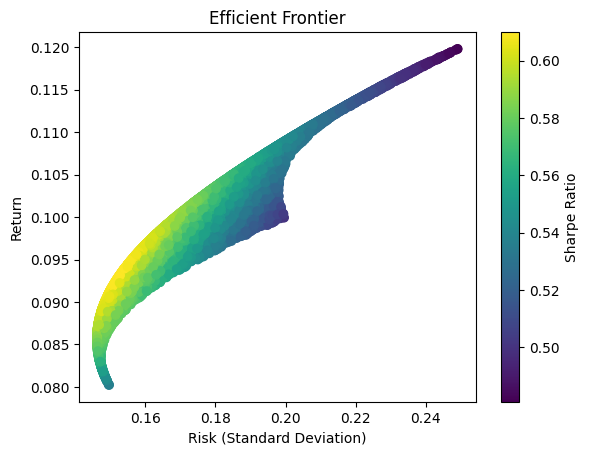

In [10]:
## Plot the efficient frontier
## Use a color scale to show the Sharpe Ratio - the ratio of return to risk
plt.scatter(results[:, 2], results[:, 1], c=results[:, 1] / results[:, 2], marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()